In [54]:
df_hitter_perf = pd.read_csv('./data/hitter_perf.csv', index_col=0)
df_hitter_etc = pd.read_csv('./data/hitter_etc.csv', index_col=0)

In [55]:
df_hitter_perf.columns,df_hitter_etc.columns

(Index([u'이름', u'연도', u'연봉(=Y)', u'총액(억)', u'계약년수(년)', u'년도', u'AVG_A', u'OBP_A', u'SLG_A', u'WAR_A', u'HR%_A', u'BB%_A', u'K%_A', u'BIPA_A', u'Spd_A', u'PSN_A', u'wOBA_A', u'wRC_A', u'wRAA_A', u'AVG_B', u'OBP_B', u'SLG_B', u'WAR_B', u'HR%_B', u'BB%_B', u'K%_B', u'BIPA_B', u'Spd_B', u'PSN_B', u'wOBA_B', u'wRC_B', u'wRAA_B'], dtype='object'),
 Index([u'Name', u'Year', u'Spectators', u'TitleSponsors', u'Broadcasting', u'GDP', u'Clubs', u'FA_Pitcher', u'FA_Hitter', u'BirthYear', u'Age', u'Captain', u'NationalMember', u'Marriage', u'Surgery', u'Salary', u'Total', u'Period', u'Transfer', u'GoldenGlove', u'Rookie', u'AllStar', u'Interest', u'Inflation', u'Hometown', u'RewardPlayer', u'PreviousTeam', u'NewTeam', u'Position'], dtype='object'))

In [94]:
dfX_hitter_perf = df_hitter_perf[['AVG_A', 'OBP_A', 'SLG_A', 'WAR_A', 'HR%_A', 'BB%_A', 'K%_A', 'BIPA_A', 'Spd_A', 'PSN_A', 'wOBA_A', 'wRC_A', 'wRAA_A', 'AVG_B', 'OBP_B', 'SLG_B', 'WAR_B', 'HR%_B', 'BB%_B', 'K%_B', 'BIPA_B', 'Spd_B', 'PSN_B', 'wOBA_B', 'wRC_B', 'wRAA_B']]
dfX_hitter_perf.columns=['AVG_A', 'OBP_A', 'SLG_A', 'WAR_A', 'HR_A', 'BB_A', 'K_A', 'BIPA_A', 'Spd_A', 'PSN_A', 'wOBA_A', 'wRC_A', 'wRAA_A', 'AVG_B', 'OBP_B', 'SLG_B', 'WAR_B', 'HR_B', 'BB_B', 'K_B', 'BIPA_B', 'Spd_B', 'PSN_B', 'wOBA_B', 'wRC_B', 'wRAA_B']
dfX_hitter_etc = df_hitter_etc[['Spectators','Broadcasting', 'GDP','Clubs','FA_Pitcher','FA_Hitter', 'Age', 'Captain', 'NationalMember', 'Marriage', 'Surgery', 'Transfer', 'GoldenGlove', 'Rookie', 'AllStar']]
dfy_hitter = df_hitter_etc['Salary']
dfX_hitter = pd.concat([dfX_hitter_perf, dfX_hitter_etc], axis=1)

In [78]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [97]:
dfX_hitter1 = pd.DataFrame(scaler.fit_transform(dfX_hitter.ix[:,:]), columns=dfX_hitter.columns[:])
df_hitter = pd.concat([dfX_hitter1,dfy_hitter],axis=1)

idx = dfy_hitter == '-'
df_hitter['Salary'][idx]=0
#df_hitter.head()

/home/dockeruser/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


IndexingError: Unalignable boolean Series key provided

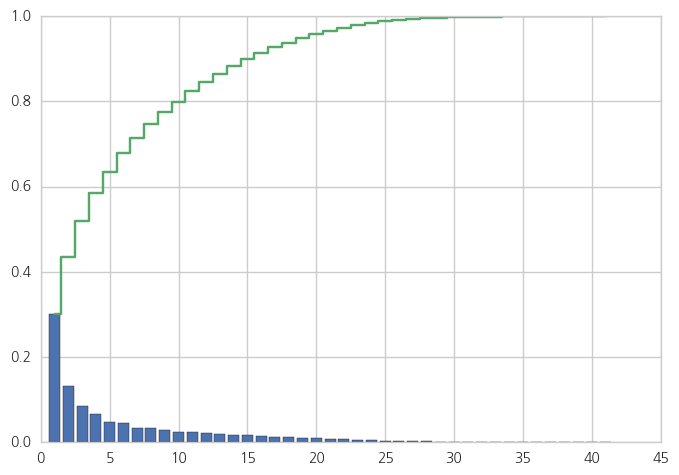

In [80]:
from sklearn.decomposition import PCA

pca = PCA().fit(dfX_hitter1)
var = pca.explained_variance_
cmap = sns.color_palette()
plt.bar(np.arange(1,len(var)+1), var/np.sum(var), align='center', color=cmap[0])
plt.step(np.arange(1,len(var)+1), np.cumsum(var)/np.sum(var), where='mid', color=cmap[1])
plt.show()

In [81]:
n = pca.explained_variance_ratio_
sum = n[0]+n[1]+n[2]+n[3]+n[4]+n[5]+n[6]+n[7]+n[8]+n[9]
sum

0.79928817735801383

In [82]:
X_pca = PCA(n_components=10)
X_pca.fit_transform(dfX_hitter1)

dfX_pca = pd.DataFrame(X_pca.fit_transform(dfX_hitter1))
dfX_pca.columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10']

PCA_model = pd.concat([dfX_pca, np.log(pd.DataFrame(dfy_hitter)+1)],axis=1)
PCA_model.columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','logSalary']

TypeError: Could not operate 1 with block values cannot concatenate 'str' and 'int' objects

In [87]:
pd.DataFrame(dfy_hitter)+1

TypeError: Could not operate 1 with block values cannot concatenate 'str' and 'int' objects